In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tabulate import tabulate
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
Input_Image = 256
Channels = 3
batch_size = 32

# Data augmentation for training set
train_data = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Training set
train_set = train_data.flow_from_directory(
    r"C:\Users\User\Desktop\MSERMSE_Temperature\New_folder\NEWWORK\train",
    target_size=(Input_Image, Input_Image),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

# Validation and test sets
common_data = ImageDataGenerator(rescale=1./255)

test_set = common_data.flow_from_directory(
    r"C:\Users\User\Desktop\MSERMSE_Temperature\New_folder\NEWWORK\test",
    target_size=(Input_Image, Input_Image),
    batch_size=batch_size,
    class_mode='categorical'
)

val_set = common_data.flow_from_directory(
    r"C:\Users\User\Desktop\MSERMSE_Temperature\New_folder\NEWWORK\val",
    target_size=(Input_Image, Input_Image),
    batch_size=batch_size,
    class_mode='categorical'
)
# Input shape
input_shape = (Input_Image, Input_Image, Channels)

Found 4745 images belonging to 4 classes.
Found 595 images belonging to 4 classes.
Found 592 images belonging to 4 classes.





19/19 [==============================] - 2s 68ms/step


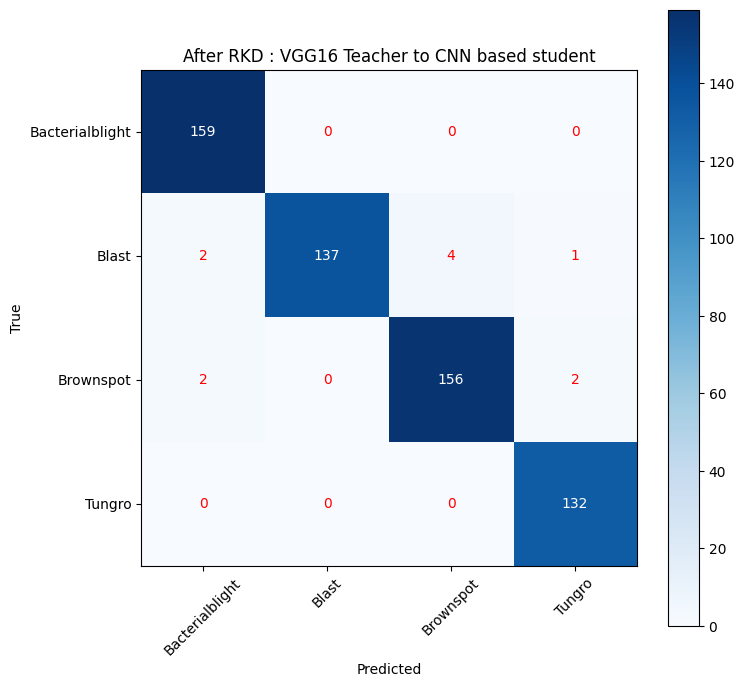

Classification Report for Distiller Model:
                  precision    recall  f1-score   support

Bacterialblight       0.98      1.00      0.99       159
          Blast       1.00      0.95      0.98       144
      Brownspot       0.97      0.97      0.97       160
         Tungro       0.98      1.00      0.99       132

       accuracy                           0.98       595
      macro avg       0.98      0.98      0.98       595
   weighted avg       0.98      0.98      0.98       595



In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved distiller model
distiller_model = tf.keras.models.load_model(r'LiteCNNRice.h5')

# Evaluate the model on the test set
distiller_model.evaluate(test_set)

# Extract test data and labels
def extract_test_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x_test = np.vstack(data_list)
    y_test = np.vstack(labels_list)
    return x_test, y_test

x_test, y_test = extract_test_data(test_set)

# Generate predictions
y_pred_probs = distiller_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
classes = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']  

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('After RKD : VGG16 Teacher to CNN based student')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Print confusion matrix values
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red' if i != j else 'white')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report for Distiller Model:\n", report)


19/19 [==============================] - 1s 63ms/step
Distiller Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.95      0.98       144
           2       0.97      0.97      0.97       160
           3       0.98      1.00      0.99       132

    accuracy                           0.98       595
   macro avg       0.98      0.98      0.98       595
weighted avg       0.98      0.98      0.98       595


Distiller Confusion Matrix:
[[159   0   0   0]
 [  2 137   4   1]
 [  2   0 156   2]
 [  0   0   0 132]]


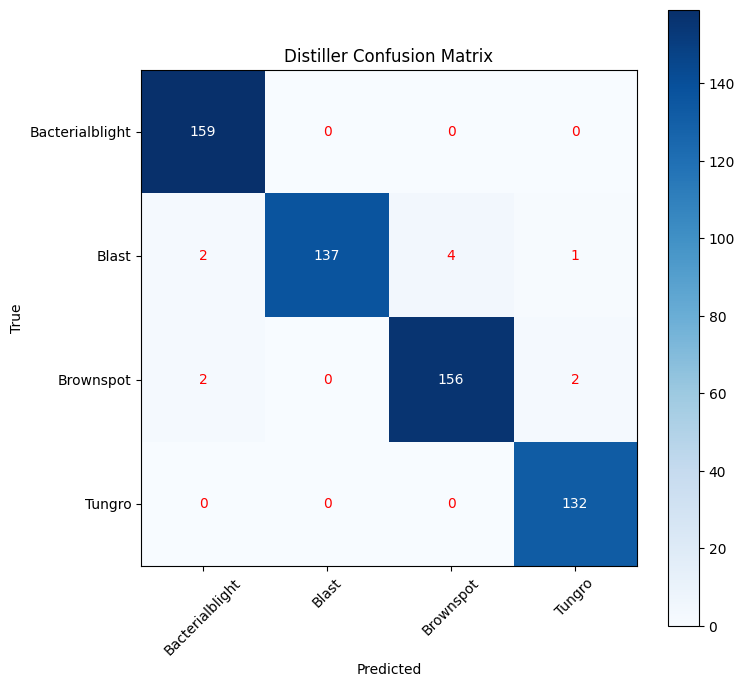

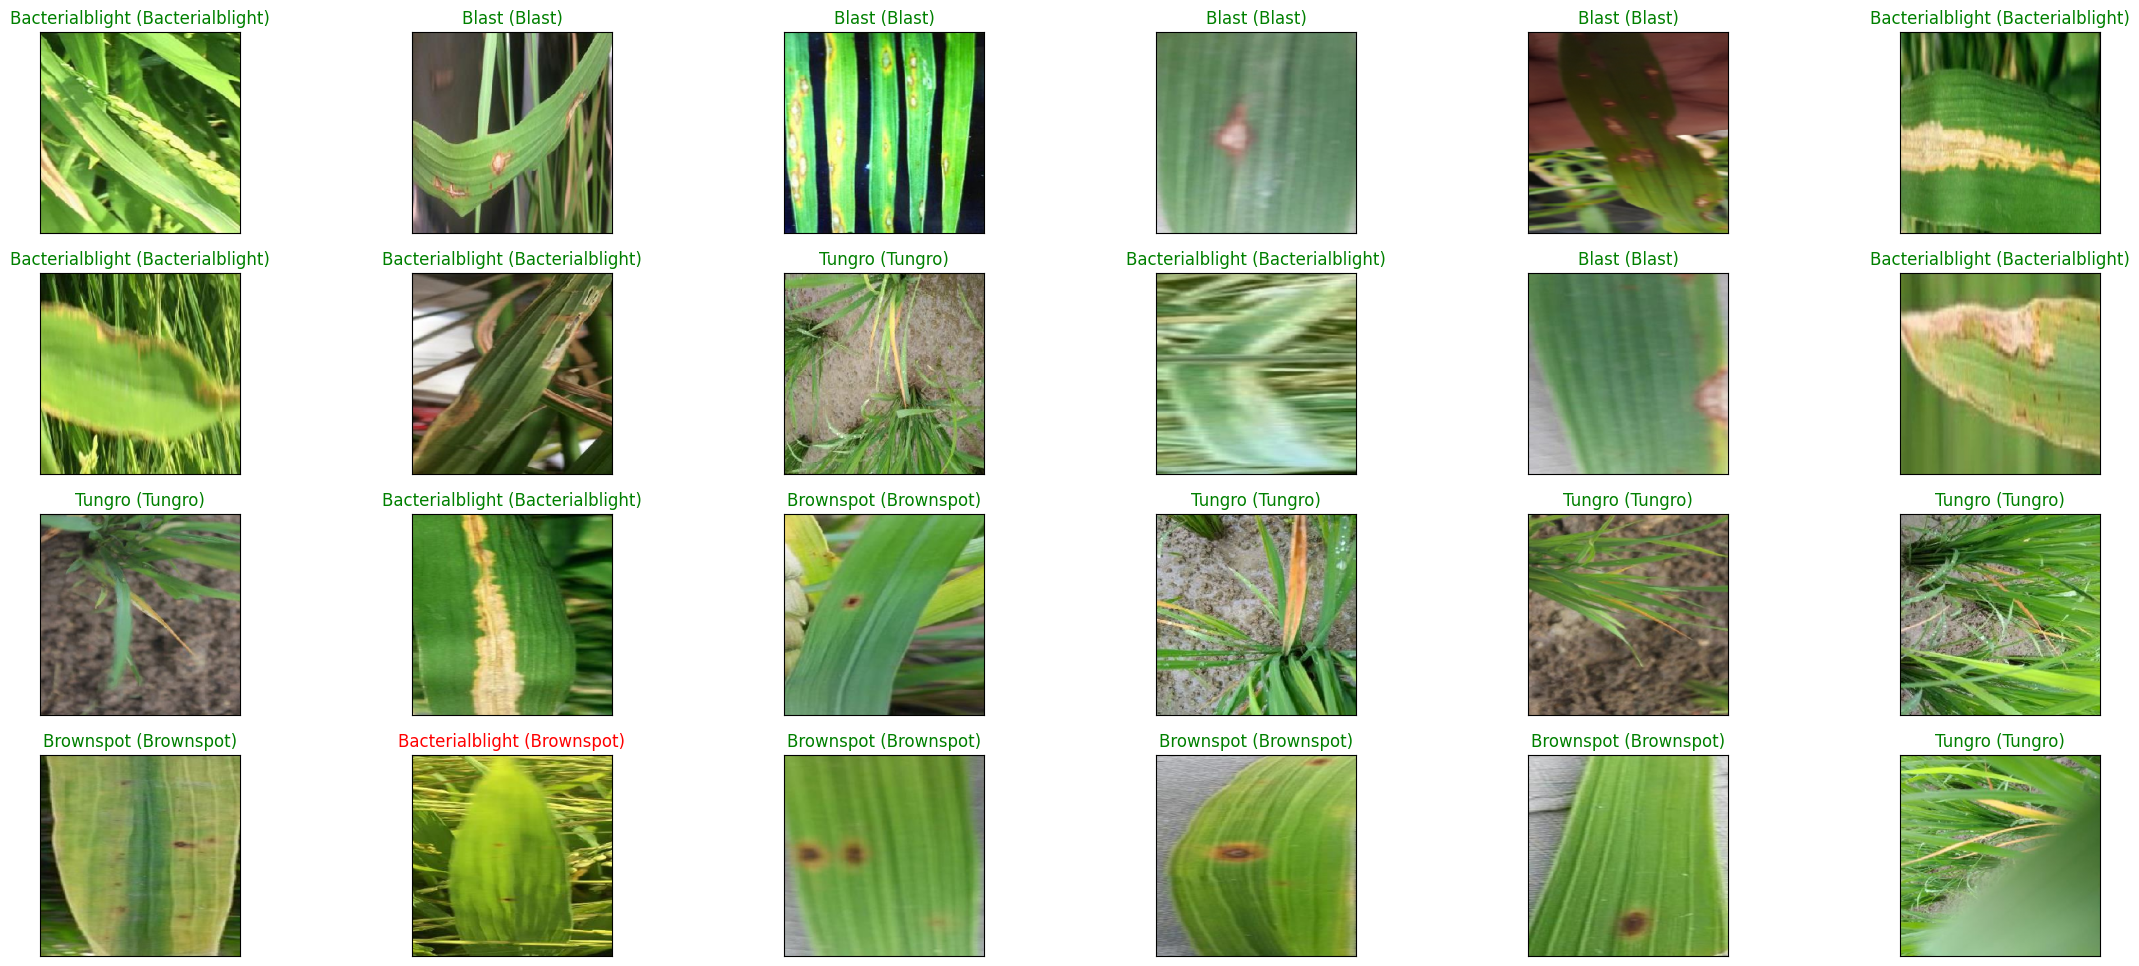

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Extract data for distiller
def extract_test_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x_test = np.vstack(data_list)
    y_test = np.vstack(labels_list)
    return x_test, y_test

x_distiller, y_distiller = extract_test_data(test_set)

# Predictions on distiller set
distiller_predictions = distiller_model.predict(x_distiller)

# Convert one-hot encoded labels to categorical labels
true_distiller_labels = np.argmax(y_distiller, axis=1)
predicted_distiller_labels = np.argmax(distiller_predictions, axis=1)

# Classification Report
print("Distiller Classification Report:")
distiller_report = classification_report(true_distiller_labels, predicted_distiller_labels)
print(distiller_report)

# Confusion Matrix
distiller_conf_matrix = confusion_matrix(true_distiller_labels, predicted_distiller_labels)
print("\nDistiller Confusion Matrix:")
print(distiller_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(distiller_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Distiller Confusion Matrix')
plt.colorbar()

# Assuming label_dict is the same for the student and distiller models
classes_distiller = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']  # Update as needed
tick_marks_distiller = np.arange(len(classes_distiller))
plt.xticks(tick_marks_distiller, classes_distiller, rotation=45)
plt.yticks(tick_marks_distiller, classes_distiller)

# Print the confusion matrix values on each cell
for i in range(len(classes_distiller)):
    for j in range(len(classes_distiller)):
        plt.text(j, i, str(distiller_conf_matrix[i, j]), ha='center', va='center', color='red' if i != j else 'white')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random predictions for the distiller model
plt.figure(figsize=(28, 12))
for i, index in enumerate(np.random.choice(x_distiller.shape[0], size=24)):
    ax = plt.subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_distiller[index]))
    predict_index = classes_distiller[predicted_distiller_labels[index]]
    true_index = classes_distiller[true_distiller_labels[index]]

    ax.set_title("{} ({})".format(predict_index, true_index),
                 color=("green" if predict_index == true_index else "red"))

# Show the random predictions
plt.show()
